In [1]:
import os
import datetime
import pandas as pd
import json
import numpy as np
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn




In [2]:

import sif.sifinfra.sif_utils as su

start_date = datetime.datetime(2008,1,1)
end_date = datetime.datetime(2014,1,1)
tickers = ['NFLX'] 
data = su.get_data('equity_raw', tickers, start_date, end_date, attributes=['ticker','date','open', 'volume', 'close', 'high', 'low', 'close'])
data

,date,low,open,ticker,volume,close,high
0,2013-12-31,51.947,52.214,NFLX,10516800.0,52.596,52.736
1,2013-12-30,51.291,52.517,NFLX,15075200.0,52.427,52.791
2,2013-12-27,52.259,53.873,NFLX,16948400.0,52.500,54.107
3,2013-12-26,53.691,54.016,NFLX,12268900.0,53.847,54.416
4,2013-12-24,53.926,54.394,NFLX,5577600.0,54.056,54.851
...,...,...,...,...,...,...,...
1506,2008-01-08,3.247,3.543,NFLX,14490000.0,3.329,3.553
1507,2008-01-07,3.386,3.530,NFLX,12693800.0,3.554,3.564
1508,2008-01-04,3.479,3.720,NFLX,17202500.0,3.516,3.796
1509,2008-01-03,3.664,3.991,NFLX,21340200.0,3.724,4.043


Created a table consisting of data from Netflix from 2008-2013



Text(0.5, 1.0, 'Netflix average closing stock price from in 2008 through 2013')

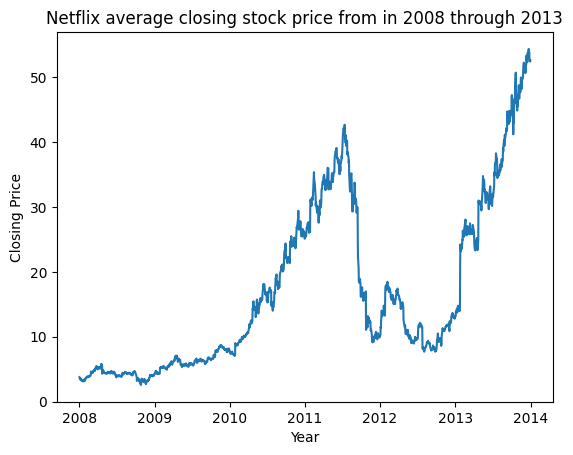

In [3]:
import matplotlib.pyplot as plt
plt.plot(data.date, data.close)
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Netflix average closing stock price from in 2008 through 2013')

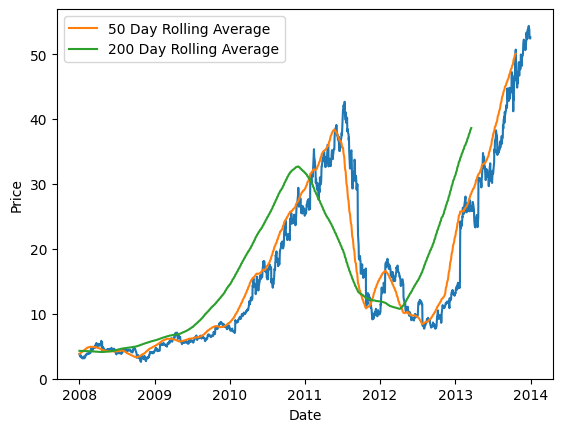

In [4]:
plt.plot(data.date, data.close)
df = pd.DataFrame(data)
plt.xlabel('Date')
plt.ylabel('Price')
df['50 Day Rolling Avg'] = data.close.rolling(window=50).mean()
df['200 Day Rolling Avg'] = data.close.rolling(window=200).mean()
plt.plot(df.date, df['50 Day Rolling Avg'], label=f'50 Day Rolling Average')
plt.plot(df.date, df['200 Day Rolling Avg'], label=f'200 Day Rolling Average')
plt.legend()

In [5]:
Fdata= su.get_data('fundamental_raw', tickers, start_date, end_date,['revenue'])
Rdata= su.get_data('equity_raw', tickers, start_date, end_date,['close'])
Fd = pd.DataFrame(Fdata)
Rd = pd.DataFrame(Rdata)
Fd['Date'] = pd.to_datetime(Fd['datekey'])
Rd['Date'] = pd.to_datetime(Rd['date'])
Merged_data= pd.merge(Fd, Rd, on= 'Date', how = 'outer')
Merged_data = Merged_data.drop(columns=['datekey', 'date'])
Merged_data = Merged_data.dropna()
Merged_data

,ticker_x,revenue,Date,ticker_y,close
0,NFLX,3.023550e+08,2008-02-28,NFLX,4.506
1,NFLX,3.261830e+08,2008-05-06,NFLX,4.420
2,NFLX,3.376140e+08,2008-08-11,NFLX,4.600
3,NFLX,3.412690e+08,2008-11-03,NFLX,3.337
4,NFLX,3.595950e+08,2009-02-25,NFLX,5.113
5,NFLX,3.940980e+08,2009-05-08,NFLX,5.746
6,NFLX,4.085090e+08,2009-07-31,NFLX,6.277
7,NFLX,4.231200e+08,2009-10-26,NFLX,7.881
8,NFLX,4.445420e+08,2010-02-22,NFLX,9.324
9,NFLX,4.936650e+08,2010-04-28,NFLX,14.199


merged revenue and closing price data, then removed the incongruent dates and null data

Text(0, 0.5, 'Price')

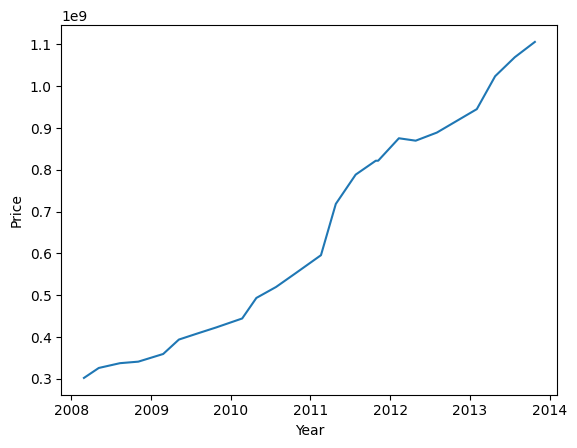

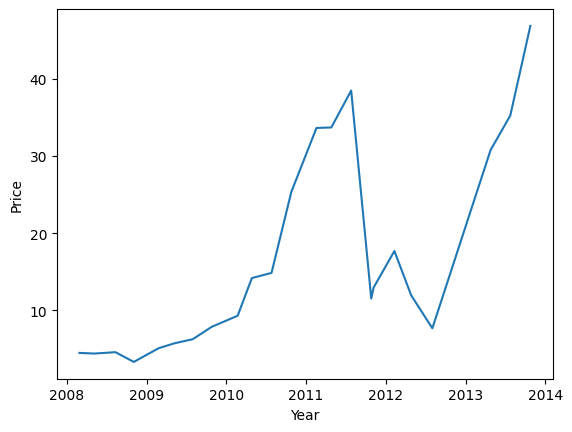

In [6]:
dM = pd.DataFrame(Merged_data)
plt.figure(1)
plt.plot(dM.Date,dM.revenue)
plt.xlabel('Year')
plt.ylabel('Price')
plt.figure(2)
plt.plot(dM.Date,dM.close)
plt.xlabel('Year')
plt.ylabel('Price')



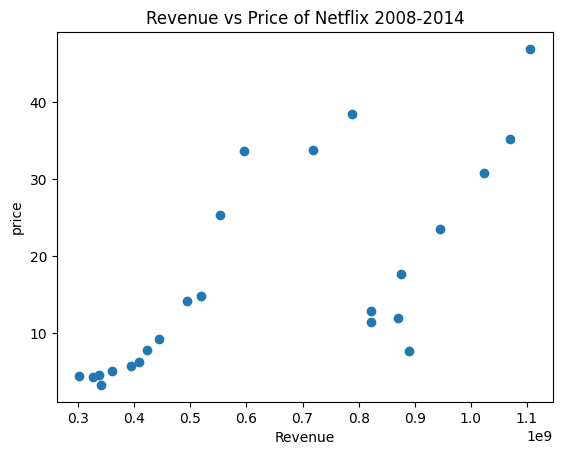

In [19]:
plt.scatter(dM['revenue'],dM['close'])
plt.xlabel('Revenue')
plt.ylabel('price')
plt.title('Revenue vs Price of Netflix 2008-2014')
plt.show()

While from 2008-2011 and 2013-2014 there appears to be decently strong correlation, its seems there

In [12]:
Ftickers=['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'AAP',
 'AMD', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE',
 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP',
 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM',
 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK',
 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BBWI', 'BAX', 'BDX', 'BRK.B',
 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY',
 'AVGO', 'BR', 'BRO', 'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL',
 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CERN', 'CF',
 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG',
 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ',
 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI',
 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH',
 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DRE', 'DD', 'DXC', 'EMN', 'ETN',
 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'LLY', 'EMR', 'ENPH', 'ETR', 'EOG', 'EFX', 'EQIX', 'EQR',
 'ESS', 'EL', 'ETSY', 'RE', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FB',
 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FRC', 'FE', 'FISV', 'FLT', 'FMC', 'F', 'FTNT', 'FTV',
 'FBHS', 'FOXA', 'FOX', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GNRC', 'GD', 'GE', 'GIS', 'GM',
 'GPC', 'GILD', 'GPN', 'GL', 'GS', 'HAL', 'HBI', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HES', 'HPE',
 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IBM', 'IEX',
 'IDXX', 'INFO', 'ITW', 'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG',
 'IVZ', 'IPGP', 'IQV', 'IRM', 'JBHT', 'JKHY', 'J', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K',
 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LEG',
 'LDOS', 'LEN', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LUMN', 'LYB', 'MTB', 'MRO', 'MPC',
 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD',
 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MSI',
 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NSC', 'NTRS',
 'NOC', 'NLOK', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'OKE', 'ORCL',
 'OGN', 'OTIS', 'PCAR', 'PKG', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PENN', 'PNR', 'PBCT', 'PEP', 'PKI', 'PFE',
 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PTC', 'PEG',
 'PSA', 'PHM', 'PVH', 'QRVO', 'QCOM', 'PWR', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG',
 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE',
 'NOW', 'SHW', 'SPG', 'SWKS', 'SNA', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STE', 'SYK', 'SIVB', 'SYF',
 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT',
 'COO', 'HIG', 'HSY', 'MOS', 'TRV', 'DIS', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRMB', 'TFC', 'TWTR',
 'TYL', 'TSN', 'USB', 'UDR', 'ULTA', 'UAA', 'UA', 'UNP', 'UAL', 'UPS', 'URI', 'UNH', 'UHS', 'VLO',
 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VIAC', 'VTRS', 'V', 'VNO', 'VMC', 'WRB', 'GWW', 'WAB',
 'WBA', 'WMT', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW',
 'WYNN', 'XEL', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS']
Nstart_date= datetime.datetime(2008,1,2)
Nend_date= datetime.datetime(2008,1,2)
Estart_date= datetime.datetime(2009,1,2)
Eend_date= datetime.datetime(2009,1,2)
Full_sdata=su.get_data('equity_raw',Ftickers, Nstart_date, Nend_date, ['close'])
Full_cdata=su.get_data('equity_raw',Ftickers, Estart_date, Eend_date, ['close'])
Full_data= pd.merge(Full_sdata,Full_cdata, on='ticker')
FD = pd.DataFrame(Full_data)
FD['subtraction'] = (FD['close_y']-FD['close_x'])
FD['result'] = FD['subtraction'] / FD['close_x']
FD['percentage'] = FD['result']*100


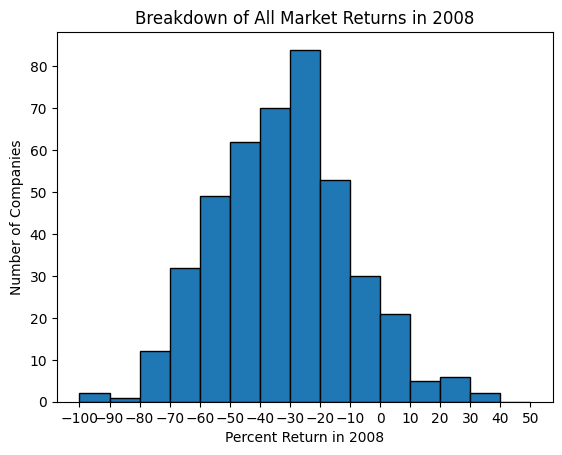

In [17]:
plt.hist(FD['percentage'], bins=[x for x in range(-100, 60, 10)], edgecolor='black')
plt.xticks(ticks=[x for x in range(-100, 60, 10)])
plt.xlabel("Percent Return in 2008")
plt.ylabel("Number of Companies")
plt.title("Breakdown of All Market Returns in 2008")
plt.show()

Taking the starting stock price close and ending stock price close the performing basic operations to recieve the ROI for all companies. It's a unimodal almost normal distribution centered around a 30% loss. Note that this is during a large housing market crash which causes all the returns to tend towards the negative.